In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as siowav
from scipy.signal import resample
import cmath
import IPython
from scipy.interpolate import interp1d

In [2]:
rollno = 224
alpha = 1+np.mod(rollno,4)

# Problem 1 - Sampling and frequency domain aliasing

## 1.1 - Plotting multiple signals in the same plot

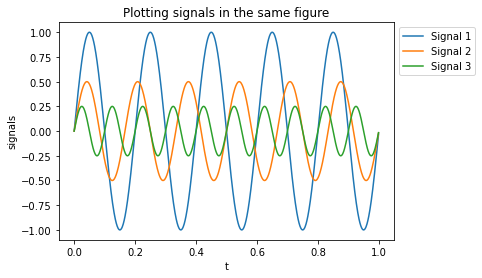

In [3]:
# Defining time range
t = np.arange(0,1,0.001)

# Defining first signal
x1 = alpha*np.sin(2*np.pi*(5*alpha)*t)
# Defining second signal
x2 = (alpha/2)*np.sin(2*np.pi*(6*alpha)*t)
# Defining third signal
x3 = (alpha/4)*np.sin(2*np.pi*(10*alpha)*t)

# Plotting the signals in the same plot
plt.figure()

plt.plot(t, x1)
plt.plot(t, x2)
plt.plot(t, x3)

plt.xlabel('t')
plt.ylabel('signals')
plt.title('Plotting signals in the same figure')

plt.legend(["Signal 1", "Signal 2", "Signal 3"], bbox_to_anchor = (1.0, 1.0))

## 1.2 - Plotting sum of signals

Text(0.5, 1.0, 'Summation of three signals')

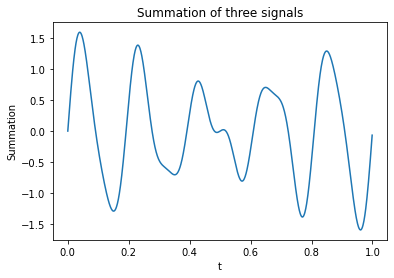

In [4]:
summation = x1+x2+x3
plt.plot(t, summation)
plt.xlabel('t')
plt.ylabel('Summation')
plt.title('Summation of three signals')

##  1.3 - Sampling

In [6]:
# Defining a function to sample a signal
def sample(signal, Fs):
    f = 1
    sampled = []
    while f < len(signal):
        sampled.append(signal[int(f)-1])
        f += 1/(Fs*0.001)
    return np.asarray(sampled)

<ipython-input-8-d007c3c9774b>:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t1, sum1)
<ipython-input-8-d007c3c9774b>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t2, sum2)
<ipython-input-8-d007c3c9774b>:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_li

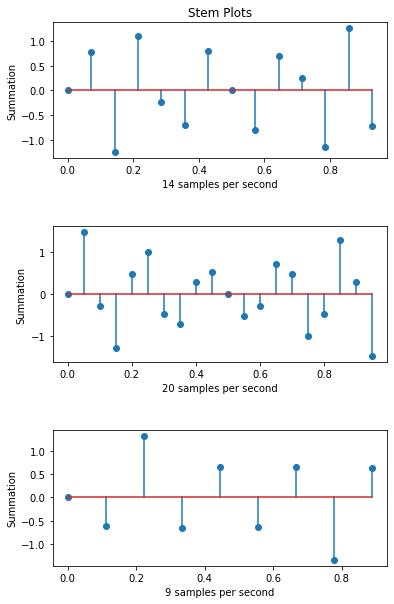

In [8]:
# Defining sampled time range

t1 = np.arange(0, 1, 1/(14*alpha))

# Nyquist rate is 2*10*alpha
t2 = np.arange(0, 1, 1/(20*alpha))

# The aliased frequencies are symmetric about the folding frequency, therefore, folding frequency is 4.5*alpha. 
# This implies that sampling frequency is 9*alpha
t3 = np.arange(0, 1, 1/(9*alpha)) 

# Defining cumulative signal for first sampling frequency
sum1  = sample(summation, 14)

# Defining cumulative signal for second sampling frequency
sum2 = sample(summation, 20)

# Defining cumulative signal for third sampling frequency
sum3 = sample(summation, 9)

# Plotting the sampled signals
plt.figure(figsize=(6,10))

plt.subplot(311)
plt.title('Stem Plots')
plt.stem(t1, sum1)
plt.xlabel('14 samples per second')
plt.ylabel('Summation')

plt.subplot(312)
plt.stem(t2, sum2)
plt.xlabel('20 samples per second')
plt.ylabel('Summation')

plt.subplot(313)
plt.stem(t3, sum3)
plt.xlabel('9 samples per second')
plt.ylabel('Summation')

plt.subplots_adjust(hspace=0.5)
plt.savefig('1.3_subplots.png')

## 1.4 - Viewing interpolation using plot function

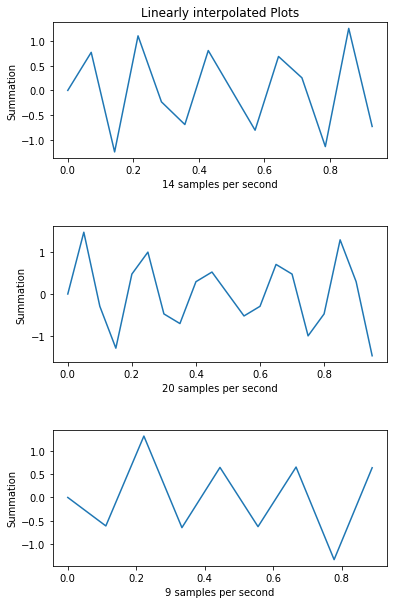

In [9]:
plt.figure(figsize=(6,10))

plt.subplot(311)
plt.title('Linearly interpolated Plots')
plt.plot(t1, sum1)
plt.xlabel('14 samples per second')
plt.ylabel('Summation')

plt.subplot(312)
plt.plot(t2, sum2)
plt.xlabel('20 samples per second')
plt.ylabel('Summation')

plt.subplot(313)
plt.plot(t3, sum3)
plt.xlabel('9 samples per second')
plt.ylabel('Summation')

plt.subplots_adjust(hspace=0.5)
plt.savefig('plot_interpolation.png')

## 1.5 - Plot energy density spectrum

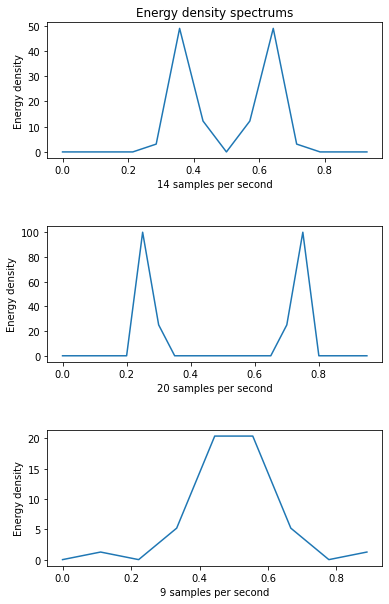

In [10]:
# Energy density spectrum of 14Hz signal
energy1 = np.square(np.abs(np.fft.fft(sum1)))
# Energy density spectrum of 20Hz signal
energy2 = np.square(np.abs(np.fft.fft(sum2)))
# Energy density spectrum of 9Hz signal
energy3 = np.square(np.abs(np.fft.fft(sum3)))

plt.figure(figsize=(6,10))

plt.subplot(311)
plt.title('Energy density spectrums')
plt.plot(t1, energy1)
plt.xlabel('14 samples per second')
plt.ylabel('Energy density')

plt.subplot(312)
plt.plot(t2, energy2)
plt.xlabel('20 samples per second')
plt.ylabel('Energy density')

plt.subplot(313)
plt.plot(t3, energy3)
plt.xlabel('9 samples per second')
plt.ylabel('Energy density')

plt.subplots_adjust(hspace=0.5)
plt.savefig('energy_density.png')

# Problem 2 - Generating digital music

In [11]:
# Defining time range
t = np.arange(0,1,1/44100)

# Frequencies in Hertz
freq_list = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]

# Defining tones and appending them to form a single signal
tones = []
for i in range(len(freq_list)):
    tone = np.sin(2*np.pi*freq_list[i]*t)
    tones.append(tone)
    if i == 0:
        appended = tone
    else:
        appended = np.concatenate((appended, tone), axis=0)
        

# Writing to a wavfile
siowav.write('problem2_appended.wav', rate=44100, data = appended.astype(np.float32))


In [12]:
# Displaying the signal
IPython.display.Audio(data=appended, rate=44100)

In [13]:
# Sampling below the Nyquist rate
appended_new = resample(appended, int(len(appended)/48))
IPython.display.Audio(data=appended_new, rate=44100/48)

# Problem 3 - Resampling

In [14]:
# Reading wavfile
Fs, track = siowav.read('Track001.wav')

# Displaying track at original sampling rate
IPython.display.Audio(data = track, rate = Fs)

In [15]:
# Resampling to half the original frequency
track2 = resample(track, int(len(track)/2))
IPython.display.Audio(data = track2, rate = Fs/2)

In [16]:
# Resampling to one-third the original frequency
track3 = resample(track, int(len(track)/3))
IPython.display.Audio(data = track3, rate = Fs/3)

In [17]:
# Resampling to one-fourth the original frequency
track4 = resample(track, int(len(track)/4))
IPython.display.Audio(data = track4, rate = Fs/4)

In [18]:
# Resampling to one-fifth the original frequency
track5 = resample(track, int(len(track)/5))
IPython.display.Audio(data = track5, rate = Fs/5)

## The Upsampling Problem

<ipython-input-19-a40a0eb3ed59>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(abs(fft))
<ipython-input-19-a40a0eb3ed59>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(signal)
<ipython-input-19-a40a0eb3ed59>:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_li

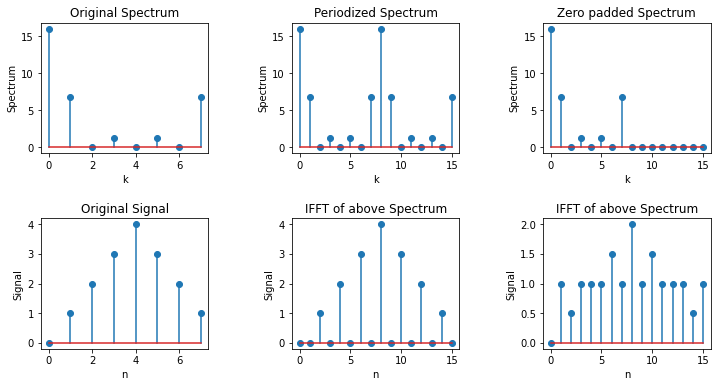

In [19]:
signal = [0,1,2,3,4,3,2,1]
fft = np.fft.fft(signal)
fft_pad = np.concatenate((fft,np.zeros_like(fft)), axis=0)
fft_concat = np.concatenate((fft,fft), axis=0)
plt.figure(figsize=(12,6))

plt.subplot(231)
plt.stem(abs(fft))
plt.xlabel('k')
plt.ylabel('Spectrum')
plt.title('Original Spectrum')

plt.subplot(234)
plt.stem(signal)
plt.xlabel('n')
plt.ylabel('Signal')
plt.title('Original Signal')

plt.subplot(232)
plt.stem(abs(fft_concat))
plt.xlabel('k')
plt.ylabel('Spectrum')
plt.title('Periodized Spectrum')

plt.subplot(235)
plt.stem(np.fft.ifft(fft_concat))
plt.xlabel('n')
plt.ylabel('Signal')
plt.title('IFFT of above Spectrum')

plt.subplot(233)
plt.stem(abs(fft_pad))
plt.xlabel('k')
plt.ylabel('Spectrum')
plt.title('Zero padded Spectrum')

plt.subplot(236)
plt.stem(np.fft.ifft(fft_pad))
plt.xlabel('n')
plt.ylabel('Signal')
plt.title('IFFT of above Spectrum')

plt.subplots_adjust(hspace=0.5, wspace=0.5)